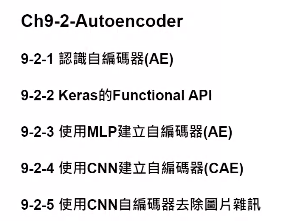
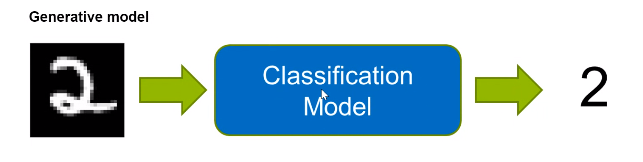
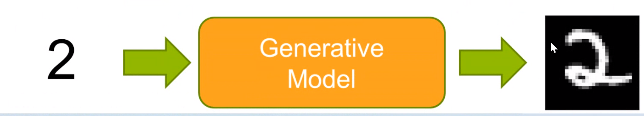
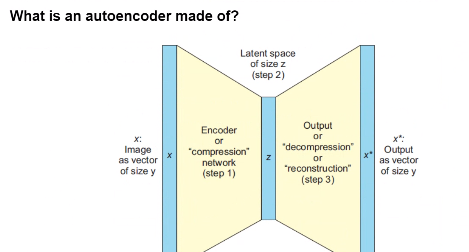
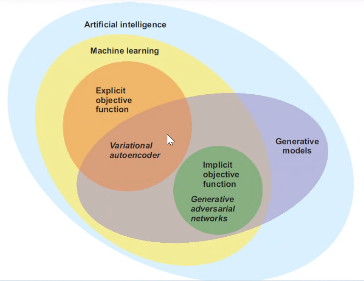
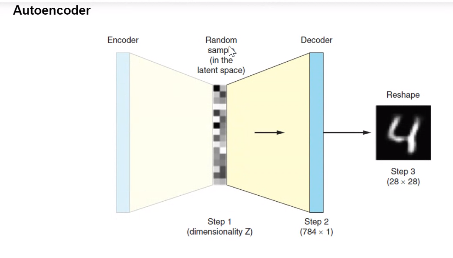
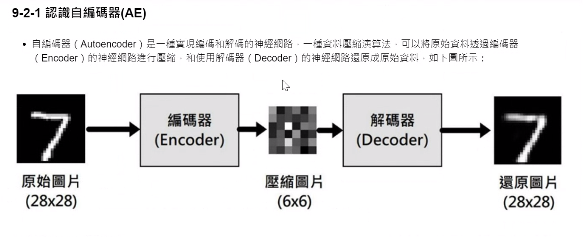
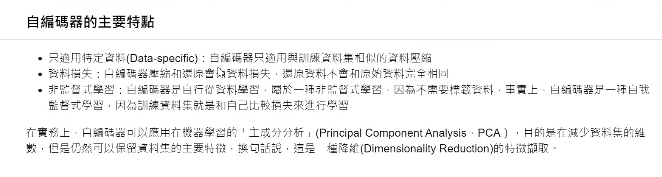
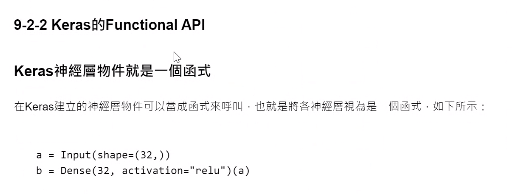
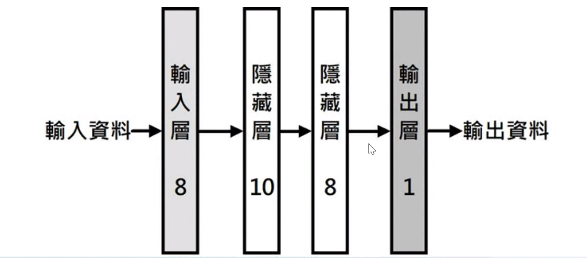
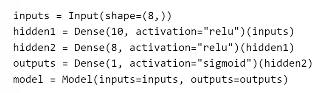


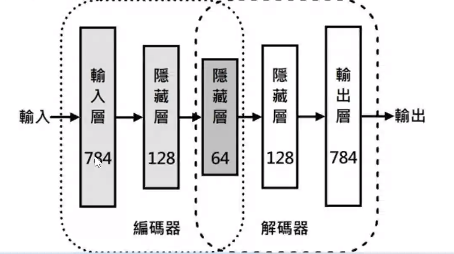
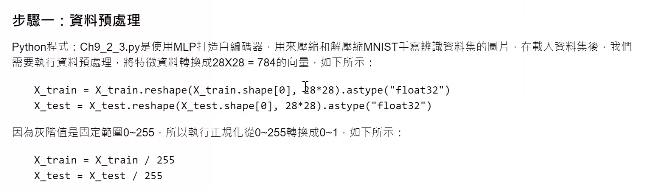
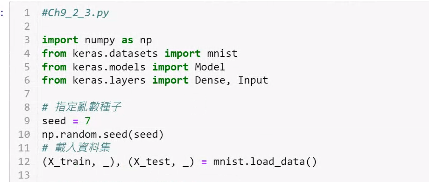
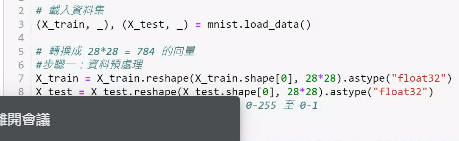
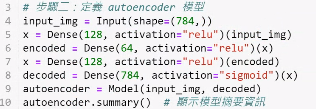
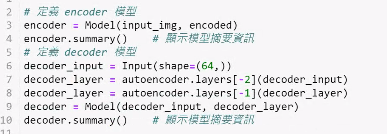
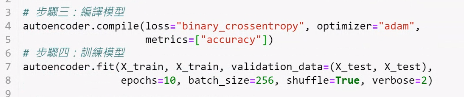
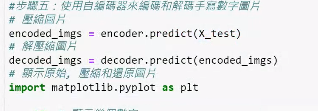
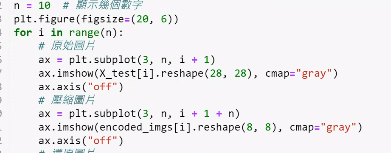

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input

np.random.seed(7)


In [ ]:
(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28*28).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28*28).astype("float32")
X_train=X_train/255
X_test=X_test/255

In [ ]:
input_img=Input(shape=(784,)) #一維784,
X=Dence(128,avtivation="relu")(input_img)
encoded=Dence(64,avtivation="relu")(X)
X=Dence(128,avtivation="relu")(encoded)
decoded=Dence(784,avtivation="sigmoid")(X)
autoencoder=Model(input_img,decoded)
autoencoder.summary()

In [ ]:
encoder=Model(input_img,encoded)
encoder.summary()

In [ ]:
decoder_input=Input(shape=(64,))
decoder_layer=autoencoder.layers[-2](decoded_input)
decoder_layer=autoencoder.layers[-1](decoded_layer)
decoder=Model(decoded_input,decoded_layer)
decoder.summary()

In [ ]:
autoencoder.compile(loss="binary_crossentropy",optimizer="adam",
                   metrics=["accuracy"])
autoencoder.fit(X_train,X_train,validation_data=(X_test,X_test),
               epochs=10,batch_size=256,shuffle=True,verbose=2) #自我監督學習


In [ ]:
encoded_imgs=encoder.predict(X_test)
decoded_imgs=decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,6))
n=10
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    ax.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    ax=plt.subplot(3,n,i+1+n)
    ax.imshow(X_test[i].reshape(8,8),cmap='gray')
    plt.axis('off')
    
    ax=plt.subplot(3,n,i+1+2*n)
    ax.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')

plt.show()

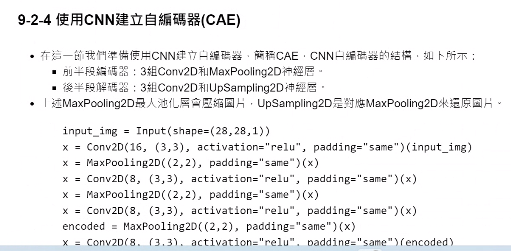

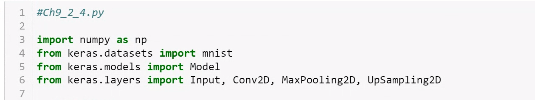
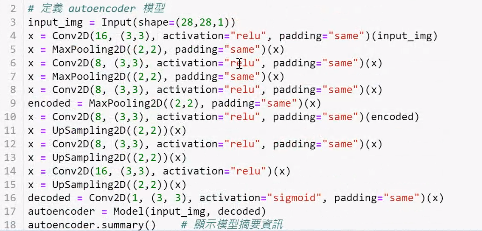
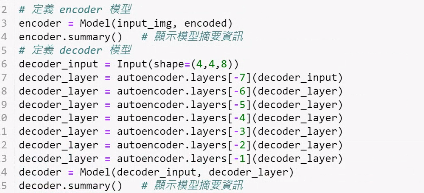
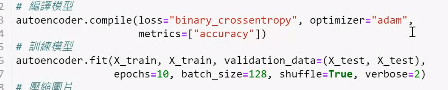
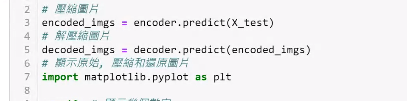
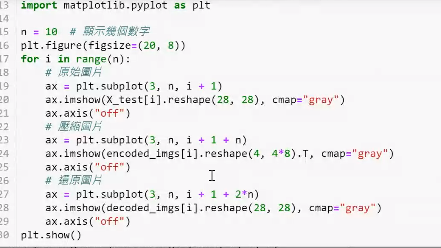

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,UpSampling2D

np.random.seed(7)

(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
X_train=X_train/255
X_test=X_test/255

In [ ]:
input_img=Input(shape=(28,28,1))
X=Conv2D(16,(3,3),avtivation="relu",padding="same")(input_img)
X=MaxPooling2D((2,2),padding="same")(X)
X=Conv2D(8,(3,3),avtivation="relu",padding="same")(x)
X=MaxPooling2D((2,2),padding="same")(X)
X=Conv2D(8,(3,3),avtivation="relu",padding="same")(input_img)
encoded=MaxPooling2D((2,2),padding="same")(X)
X=Conv2D(8,(3,3),avtivation="relu",padding="same")(encoded)
X=UpSampling2D((2,2))(X)
X=Conv2D(8,(3,3),avtivation="relu",padding="same")(x)
X=UpSampling2D((2,2))(X)
X=Conv2D(16,(3,3),avtivation="relu")(x)
X=UpSampling2D((2,2))(X)
decoded=Conv2D(1,(3,3),avtivation="sigmoid",padding="same")(X)
autoencoder=Model(input_img,decoded)
autoencoder.summary()

In [ ]:
encoder=Model(input_img,encoded)
encoder.summary()

In [ ]:
decoder_input=Input(shape=(4,4,8))
decoder_layer=autoencoder.layers[-7](decoded_input)
decoder_layer=autoencoder.layers[-6](decoded_layer)
decoder_layer=autoencoder.layers[-5](decoded_layer)
decoder_layer=autoencoder.layers[-4](decoded_layer)
decoder_layer=autoencoder.layers[-3](decoded_layer)
decoder_layer=autoencoder.layers[-2](decoded_layer)
decoder_layer=autoencoder.layers[-1](decoded_layer)
decoder=Model(decoded_input,decoded_layer)
decoder.summary()

In [ ]:
autoencoder.compile(loss="binary_crossentropy",optimizer="adam",
                   metrics=["accuracy"])
autoencoder.fit(X_train,X_train,validation_data=(X_test,X_test),
               epochs=10,batch_size=128,shuffle=True,verbose=2) 


In [ ]:
encoded_imgs=encoder.predict(X_test)
decoded_imgs=decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
n=10
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    ax.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    ax=plt.subplot(3,n,i+1+n)
    ax.imshow(X_test[i].reshape(4,4*8),cmap='gray')
    plt.axis('off')
    
    ax=plt.subplot(3,n,i+1+2*n)
    ax.imshow(X_test[i].reshape(28,28),cmap='gray')
    plt.axis('off')

plt.show()

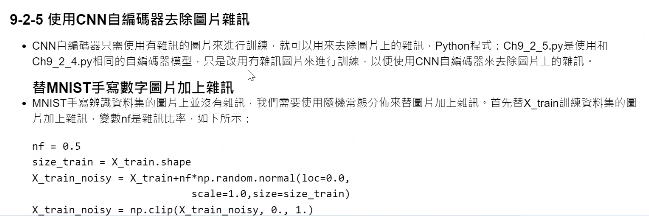
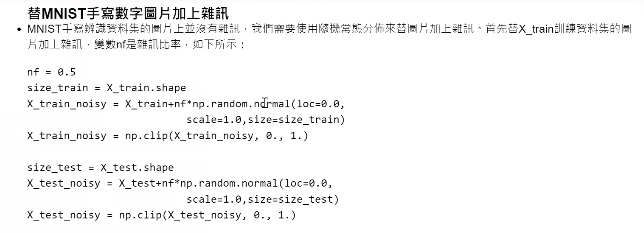
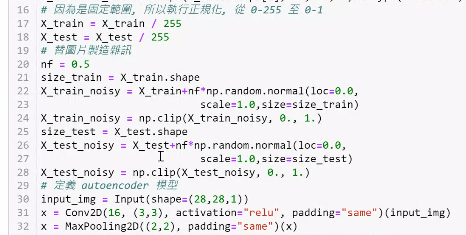

In [ ]:
nf = 0.5
size_train = X_train.shape
X_train_noisy = X_train+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_train)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
size_test = X_test.shape
X_test_noisy = X_test+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_test)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

#### VAE
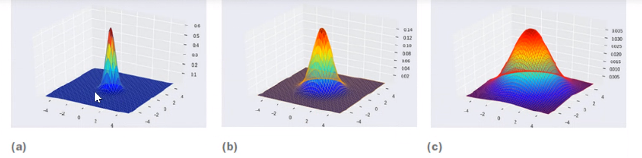
    平均值一樣 差在變異數
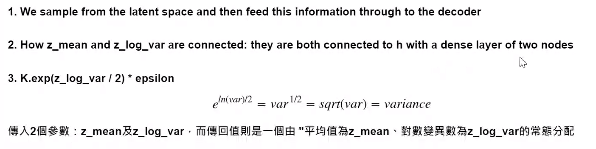
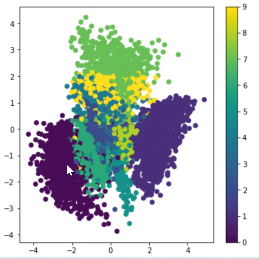
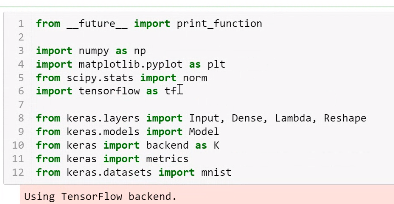
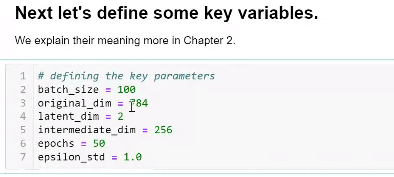
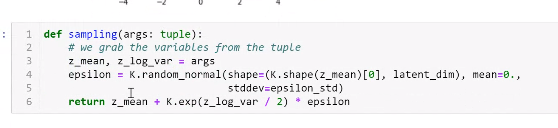
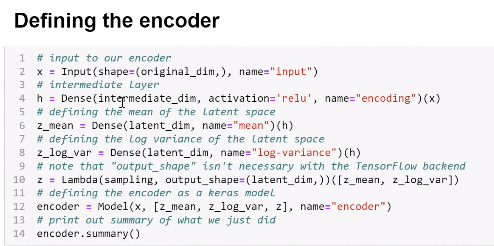

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import tensorflow as tf

from keras.layers import Input,Dense,Lambda,Reshape
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

In [ ]:
batch_size=100
original_dim=784
latent_dim=2
intermediate_dim=256
epochs=50
epsilon_std=1.0

In [ ]:
def sampling(args:tuple):
    z_mean,z_log_var=args
    epsilon=K.radom_normal(shape=(K.shape(z_mean)[0],latent_dim),mean=0.,
                          stddev=epsilon_std)
    return z_mean+K.exp(z_log_var/2)*epsilon